In [1]:
import os
import glob
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.metrics
import seaborn as sns
#import efficientnet.tfkeras as efn
from collections import Counter
from keras_preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from keras.models import  Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D, BatchNormalization, Concatenate
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv1D, Conv2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

plt.style.use('ggplot')

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from tensorflow.keras.applications import Xception

In [5]:
xception_conv = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in xception_conv.layers:
    layer.trainable = True

for layer in xception_conv.layers:
    print(layer, layer.trainable)

model = models.Sequential()

model.add(xception_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization())
#model.add(layers.Dropout(0.3))
model.add(layers.Dense(13, activation='softmax'))

model.summary()

<keras.engine.input_layer.InputLayer object at 0x7f430c54ea50> True
<keras.layers.convolutional.Conv2D object at 0x7f430c55d590> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f430c4ea350> True
<keras.layers.core.activation.Activation object at 0x7f430c547590> True
<keras.layers.convolutional.Conv2D object at 0x7f430c01b190> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f42f4b3e590> True
<keras.layers.core.activation.Activation object at 0x7f42f4b40a90> True
<keras.layers.convolutional.SeparableConv2D object at 0x7f42f4b50290> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f42f4b4a110> True
<keras.layers.core.activation.Activation object at 0x7f42f4b5e110> True
<keras.layers.convolutional.SeparableConv2D object at 0x7f430c5353d0> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f42f4b2b750> True
<keras.layers.convolutional.Conv2D object 

In [6]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-7)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

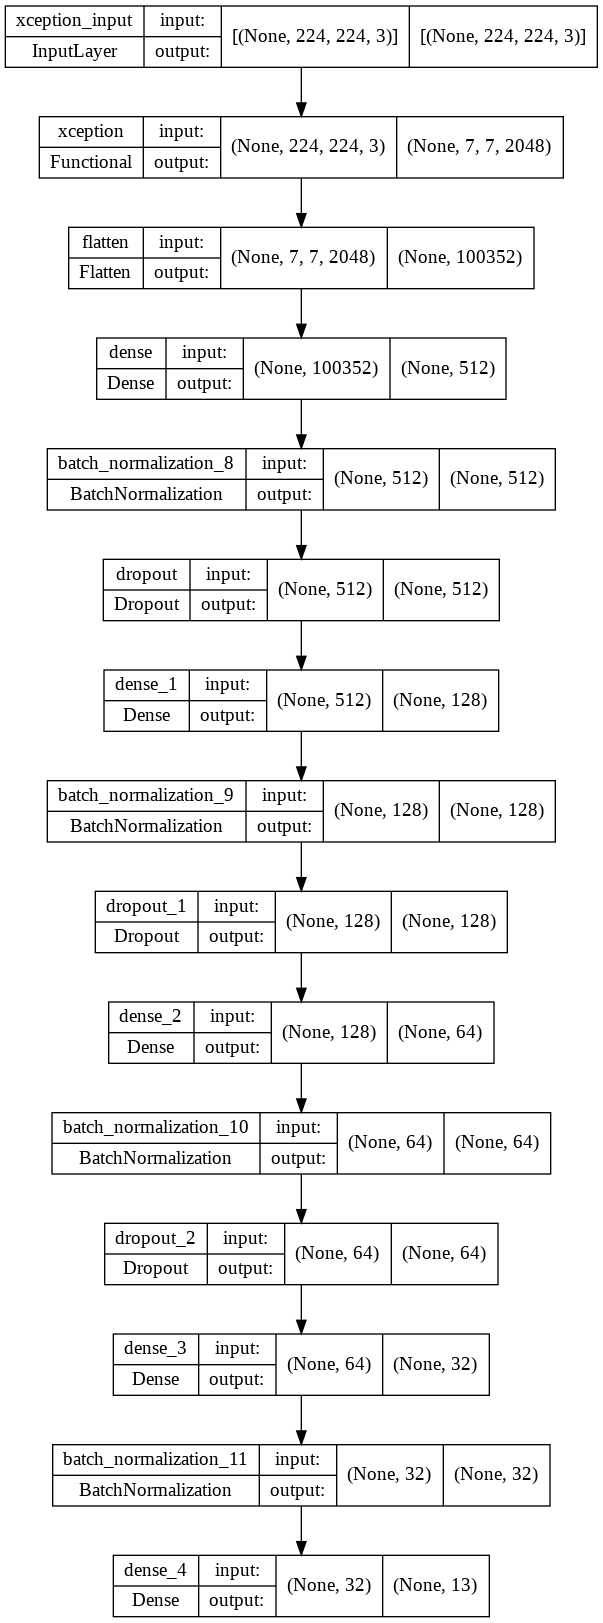

In [7]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names = True)
from IPython.display import Image
Image(filename='model.png')

In [8]:
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/New_8_1/train/',
                                                 target_size = (224, 224),
                                                 shuffle=True)

Found 10590 images belonging to 13 classes.


In [11]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/New_8_1/val/',
                                            target_size = (224, 224), shuffle=False)

Found 1303 images belonging to 13 classes.


In [12]:
for cls, idx in training_set.class_indices.items():
    print('Class nr ',idx,' -> ', cls)

Class nr  0  ->  0Capri
Class nr  1  ->  10Pachy
Class nr  2  ->  12Phyll
Class nr  3  ->  14Macro
Class nr  4  ->  1Pnoep
Class nr  5  ->  2Malac
Class nr  6  ->  3Malac
Class nr  7  ->  4Anthi
Class nr  8  ->  5Anthr
Class nr  9  ->  6Corvu
Class nr  10  ->  7Dryoc
Class nr  11  ->  8Elanu
Class nr  12  ->  9Ortho


In [13]:
model_history = model.fit(training_set, batch_size=16, epochs=10, verbose=1, validation_data=(test_set))

Epoch 1/10
331/331 [==============================] - 4051s 12s/step - loss: 1.8850 - accuracy: 0.4281 - val_loss: 1.0320 - val_accuracy: 0.6946
Epoch 2/10
331/331 [==============================] - 195s 589ms/step - loss: 1.0938 - accuracy: 0.7131 - val_loss: 0.7265 - val_accuracy: 0.8127
Epoch 3/10
331/331 [==============================] - 196s 592ms/step - loss: 0.8133 - accuracy: 0.8024 - val_loss: 0.5810 - val_accuracy: 0.8473
Epoch 4/10
331/331 [==============================] - 196s 590ms/step - loss: 0.6363 - accuracy: 0.8509 - val_loss: 0.5455 - val_accuracy: 0.8649
Epoch 5/10
331/331 [==============================] - 195s 589ms/step - loss: 0.5129 - accuracy: 0.8837 - val_loss: 0.4781 - val_accuracy: 0.8826
Epoch 6/10
331/331 [==============================] - 196s 592ms/step - loss: 0.4273 - accuracy: 0.9065 - val_loss: 0.4368 - val_accuracy: 0.8856
Epoch 7/10
331/331 [==============================] - 197s 593ms/step - loss: 0.3536 - accuracy: 0.9229 - val_loss: 0.4153 - 

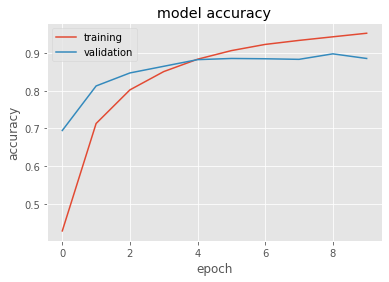

In [14]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

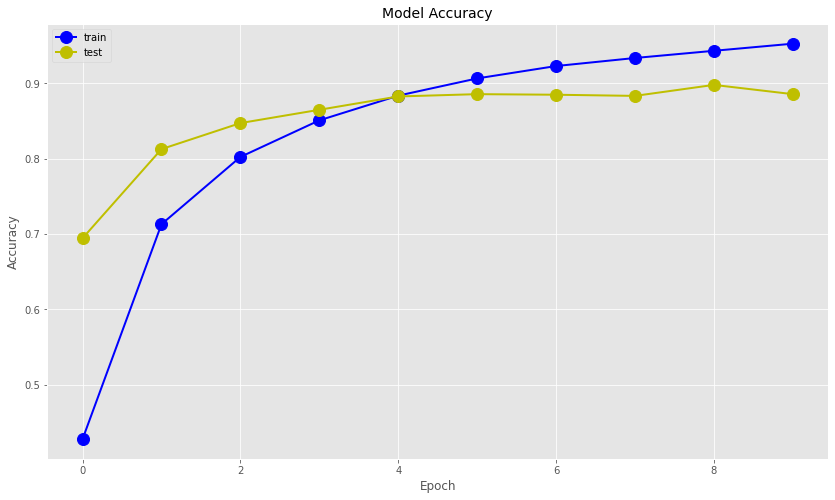

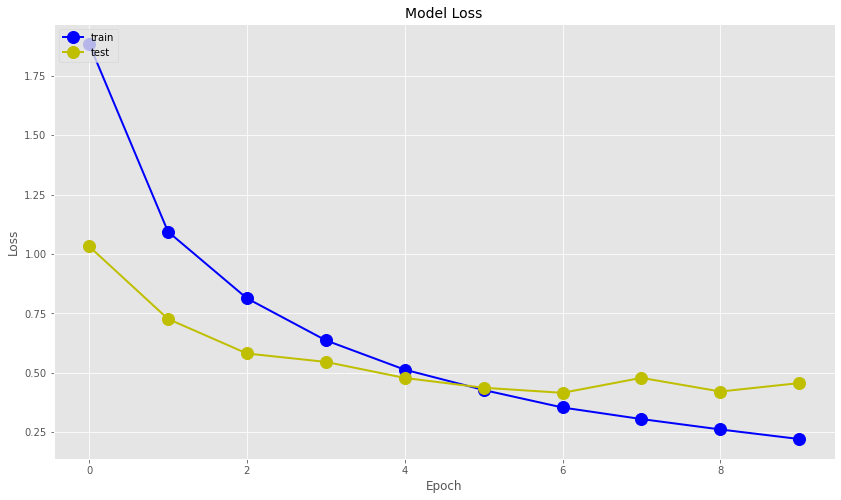

In [15]:
plt.figure(figsize=(14,8))
plt.plot(model_history.history['accuracy'], 'bo-', linewidth=2, markersize=12)
plt.plot(model_history.history['val_accuracy'], 'yo-', linewidth=2, markersize=12)
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(model_history.history['loss'], 'bo-', linewidth=2, markersize=12 )
plt.plot(model_history.history['val_loss'], 'yo-', linewidth=2, markersize=12)
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
target_names = []
for key in training_set.class_indices:
  target_names.append(key)

print(target_names)

['0Capri', '10Pachy', '12Phyll', '14Macro', '1Pnoep', '2Malac', '3Malac', '4Anthi', '5Anthr', '6Corvu', '7Dryoc', '8Elanu', '9Ortho']


41/41 [==============================] - 8s 184ms/step - loss: 0.4564 - accuracy: 0.8856
n Test_Accuracy:- 0.8856484889984131
confusion matrix
[[ 70   5   0   0   0   0   0   0   4   0   0   0   1]
 [  0  48   1   0   0   3   1   0   0   0   0   0   1]
 [  1   1 264   1   4   0   0   0   4   1   0   0   1]
 [  0   3   4 174   0   0   0   0   0   1   0   0   1]
 [  0   0   3   2 139   3   0   0   0   1   0   0   0]
 [  1   2   0   0   0  56   1   0   1   0   1   0   0]
 [  0  18   2   7   0   0  39   1   0   1   0   0  12]
 [  0   0   1   0   5   1   0  32   0   1   0   0   0]
 [  2   2   2   1   0   0   0   0  39   0   0   0   2]
 [  0   0   0   4   0   0   0   0   7  60   0   0   0]
 [  2   4   0   0   0   0   2   0   1   0  42   0   7]
 [  0   1   1   1   0   0   0   0   0   1   0 134   0]
 [  0   4   2   1   0   0   0   0   0   0   0   0  57]]


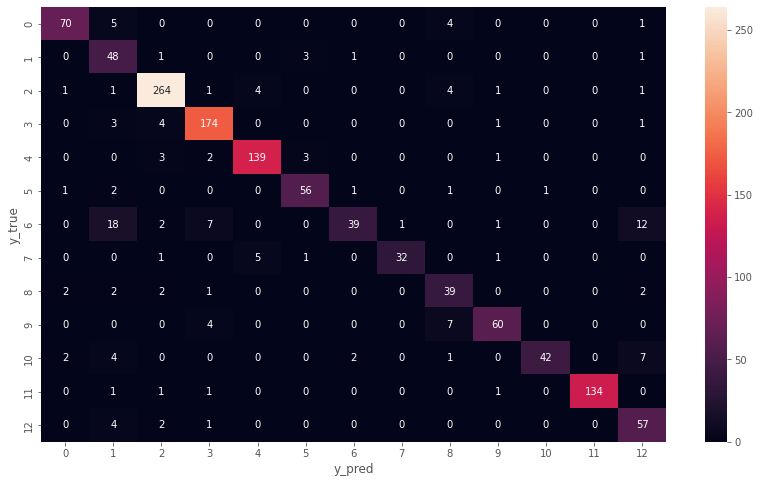

In [17]:
accuracy = model.evaluate(test_set)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(test_set)
y_pred = np.argmax(pred, axis=1)
#y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(test_set.classes, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(test_set.classes, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [18]:
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names ))

Classification Report
              precision    recall  f1-score   support

      0Capri       0.92      0.88      0.90        80
     10Pachy       0.55      0.89      0.68        54
     12Phyll       0.94      0.95      0.95       277
     14Macro       0.91      0.95      0.93       183
      1Pnoep       0.94      0.94      0.94       148
      2Malac       0.89      0.90      0.90        62
      3Malac       0.91      0.49      0.63        80
      4Anthi       0.97      0.80      0.88        40
      5Anthr       0.70      0.81      0.75        48
      6Corvu       0.91      0.85      0.88        71
      7Dryoc       0.98      0.72      0.83        58
      8Elanu       1.00      0.97      0.99       138
      9Ortho       0.70      0.89      0.78        64

    accuracy                           0.89      1303
   macro avg       0.87      0.85      0.85      1303
weighted avg       0.90      0.89      0.89      1303



In [ ]:
model.save('/content/drive/MyDrive/Birddata_split/resnet50_mels15.hdf5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
finalpreds = pd.DataFrame(y_pred)
#finalpreds.columns = sub_temp.columns
finalpreds.to_csv('/content/drive/MyDrive/Birddata_split/submit15.csv',index=False)

In [19]:
target_names1 = []
for key in test_set.class_indices:
  target_names1.append(key)

print(target_names1)

['0Capri', '10Pachy', '12Phyll', '14Macro', '1Pnoep', '2Malac', '3Malac', '4Anthi', '5Anthr', '6Corvu', '7Dryoc', '8Elanu', '9Ortho']


ROC AUC score: 0.9198632053262004


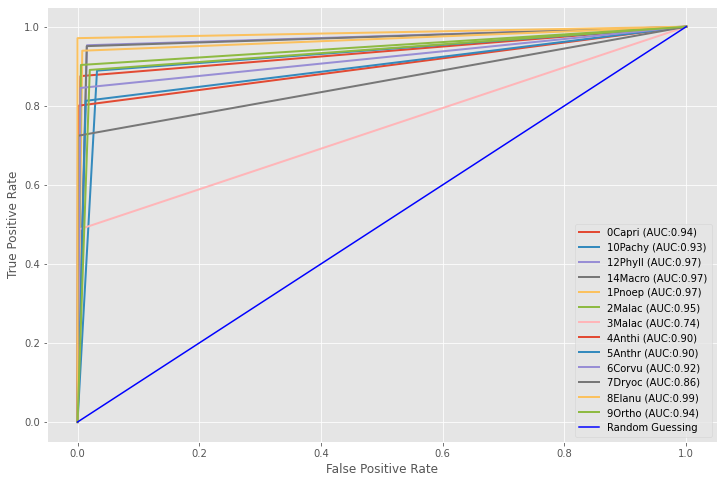

In [20]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_preds, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_preds = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target_names1):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_preds[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)),linewidth=2)
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_preds, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(test_set.classes, pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [21]:
top_k_accuracy_score(test_set.classes, pred, k=5)

0.9646968534151957

In [22]:
top_k_accuracy_score(test_set.classes, pred, k=5, normalize=False)

1257

In [23]:
top_k_accuracy_score(test_set.classes, pred, k=1)

0.8856485034535687

In [24]:
top_k_accuracy_score(test_set.classes, pred, k=1, normalize=False)

1154